# Practical 8 (Part III) - Recommender System (Collaborative Filtering)

Recommender systems are algorithms aimed at suggesting relevant items to users. Collaborative filtering based solely on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”. This practical demonstrates how to build a recommender system that identify movies to view based on collaborative filtering method.

## Section 1 Data Preparation

1. Reading data from files

"file.tsv" contains 100,003 rows of records that store the user ratings as shown in the table below.

| user_id | item_id | rating | timestamp |
| --- | --- | --- | --- |
|0 | 50 |	5 |	881250949|
|0 | 172 |	5 |	881250949|
|0 | 133 |	1 |	881250949|
|196 | 242 | 3 | 881250949|
|186 | 302 | 3 | 891717742|

On the other hand, "Movie_Id_Titles.csv" contains 1682 movie titles associated with their item_id.

Can do two recommender system > user-user or item-item
if people A and people b like the same categories then the people A will recommend the googles to the people B (it may recommend different product based on your behaviour)


In [5]:
import pandas as pd              # import pandas as pd 
  
# Get the data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']   # define 4 columns ['user_id', 'item_id', 'rating', 'timestamp'] 
  
path = r'C:\Users\User\Downloads\file.tsv'                                #read file 'file.tsv'

# tsv is tab-separated values file
df = pd.read_csv(path, sep='\t', names=column_names) 
  
# Check the head of the data 
df.head() 

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv(r'C:\Users\User\Downloads\Movie_Id_Titles.csv')              #read another file Movie_Id_Titles.csv
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


<hr/>
2. Now let's merge these 2 files together.
<hr/>

****************no need to merge if one file only****************

In [11]:
data = pd.merge(df, movie_titles, on='item_id')     #merge both file based on item_id
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


<hr/>
3. We need to group the movie titles and view their ratings in the descending order.
<hr/>

In [13]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

## Section 2 Data Exploration

****************Not important******************

4 . Let's observe the top rated movies

In [18]:
# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
data.groupby('title').count().info

<bound method DataFrame.info of                                        user_id  item_id  rating  timestamp
title                                                                     
'Til There Was You (1997)                    9        9       9          9
1-900 (1994)                                 5        5       5          5
101 Dalmatians (1996)                      109      109     109        109
12 Angry Men (1957)                        125      125     125        125
187 (1997)                                  41       41      41         41
...                                        ...      ...     ...        ...
Young Guns II (1990)                        44       44      44         44
Young Poisoner's Handbook, The (1995)       41       41      41         41
Zeus and Roxanne (1997)                      6        6       6          6
unknown                                      9        9       9          9
Á köldum klaka (Cold Fever) (1994)           1        1       1     

5. We can observe that there are 1664 movies with rating. Let's calculate the average rating of each movie

In [23]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  

#add another column called "num of ratings" that count the total rating
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


6. Let's create a histogram to check out the number of ratings received against the count

<Axes: >

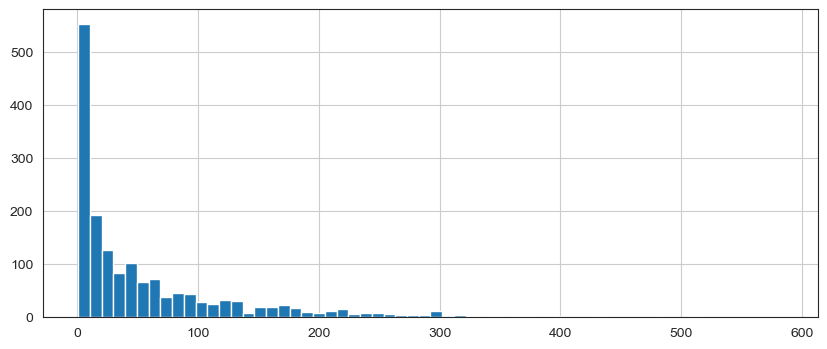

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 
 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 60) 

From the histogram, we can observe that majority of the movies (more than 500) obtained less than 10 ratings

<Axes: >

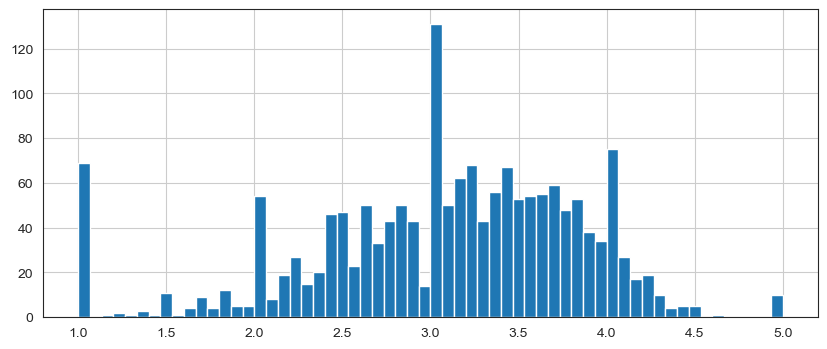

In [28]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 60) 

From the histogram, we can observe that majority of the movies (more than120) obtained a rating around 3.

## Section 3 Building User-Item Interactions Matrix

User-item matrix is a basic foundation of traditional collaborative filtering techniques. In this practical, the rating for target movie item i for an active user can be predicted by using a simple weighted average (mean). 

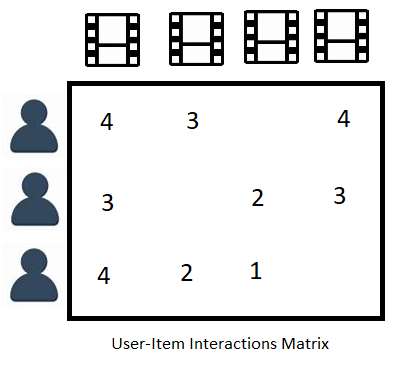

7. Let's build the user-item matrix

In [35]:
# Sorting values according to  
# the 'num of rating column' 
moviemat = data.pivot_table(index ='user_id',                        #use pivot_table to build 'rating' matrix based on 'user_id' and 'title'
              columns ='title', values ='rating') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


8. Now check out the Star Wars movie

This is item-item based

In [39]:
# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)']            #to obtain the rating for Star Wars (1977)

# you may try with other movie titles later
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

9. We are interested to find out movies with similar ratings

In [42]:
# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)  #to find the correlation from all movies to the user input in previous step using .corrwith(starwars_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head() 

C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [44]:
# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
corr_starwars.head() 
  
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


## Exercise

Perform steps in <b>Section 3</b> to recommend similar movies to the user if he likes 

1) Liar Liar (1997)

2) Return of the Jedi (1983)